# Use the pure tensorflow keras  linear modules to build the Neural Network

In [42]:
# All posible imports
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense

# Utility function for 3D plot
We will be using this 3D plot in order to plot the real values of y with respect to the predicted values of y. This will help us in understading how those two values are related and how they change with or without activation function.

In [43]:
# Utility function to plot 3D Graphs
def plot_3d(comp, title, X, y, y_pred=None):
    X_tnse = TSNE(n_components=comp, random_state=123).fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if y_pred is not None:
        ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
    ax.set_title(title)
    plt.legend()
    plt.show()

# Generating Sample data 3 inputs & 2 output

In [44]:
n = 200

# We need to take 3 inputs
inputs_dimensions = 3

# We need to have 2 outputs
output_dimensions = 2

# Setup some random seed
tf.random.set_seed(3)

# Generating X with 3 dimentions
X = tf.random.uniform((n, inputs_dimensions), -1, 1)

# Generating the value of the y_true
weights_true = tf.constant([[2., -5., 9.], [-1., 4., -5.]], dtype=tf.float32)
bias_true = tf.constant([[1], [-1]], dtype=tf.float32)

y_true = tf.matmul(9 * X ** 2, weights_true, transpose_b=True) + tf.matmul(X, weights_true, transpose_b=True) + tf.transpose(bias_true)

print('Sample Value for X:' + str(X[:3]))
print('Sample Value for y:'+ str(y_true[:3]))

Sample Value for X:tf.Tensor(
[[-0.73267365  0.13570619 -0.00733662]
 [-0.9662695   0.00908351  0.4974625 ]
 [-0.73932624 -0.32877016  0.30385542]], shape=(3, 3), dtype=float32)
Sample Value for y:tf.Tensor(
[[  7.628318   -3.8585553]
 [ 40.346657  -22.020931 ]
 [ 16.35329    -8.277992 ]], shape=(3, 2), dtype=float32)


# Plotting the data in a 3-Dimentional Plane

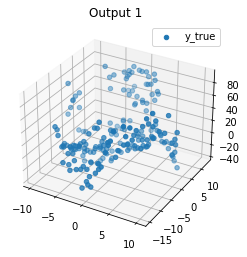

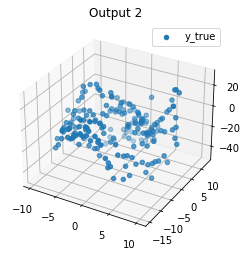

In [45]:
plot_3d(2, 'Output 1', X, y_true[:,0])
plot_3d(2, 'Output 2', X, y_true[:,1])

# Hyperparameters - Various Parameters that we will be using

In [46]:
# Number of Iterations
epochs = 200

# Learning rate of the algorithm
learning_rate = 0.01

# Inputs and outputs size. i.e 2 and 3 relatively
inputs = X.shape[1]
outputs = y_true.shape[1]

print("Number of inputs ==> " +str(inputs))
print("Number of outputs ==> " +str(outputs))

Number of inputs ==> 3
Number of outputs ==> 2


In [47]:
class Model(tf.keras.Model):
    def __init__(self, num_inputs=3, num_hidden=[2], num_outputs=2, activation=None, **kwargs):
        super(Model, self).__init__(**kwargs)
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs

        layers_nodes = [self.num_inputs] + self.num_hidden + [self.num_outputs]
    
        layers = []
        for i in range(len(layers_nodes[:-1])):
            if i == len(layers_nodes[:-1]) - 1:
                layers.append(Dense(layers_nodes[i + 1]))
            else:
                layers.append(Dense(layers_nodes[i + 1], activation=activation))

        self.layers_ = layers

    def forward(self, x):
        curr_out = X
        for layer in self.layers_:
            curr_out = layer(curr_out)
        return curr_out
  
    def call(self, inputs):
        curr_out = X
        for layer in self.layers_:
            curr_out = layer(curr_out)
        return curr_out
  
    def fit(self, X, y_true, lr, epochs):
        loss_fn  = tf.keras.losses.MeanSquaredError()
        optimizer = tf.keras.optimizers.Adam()
        for epoch in range(epochs):
            with tf.GradientTape(persistent=True) as tape:
                y_pred = self.forward(X)
                error = loss_fn(y_pred, y_true)
                print(error)

            for layer in self.layers:
                gradients = tape.gradient(error, layer.trainable_weights)
                optimizer.apply_gradients(zip(gradients, layer.trainable_weights))


# Training with Activation function RELU

In [48]:
nn = Model(num_inputs=inputs, num_hidden=[4, 3], num_outputs=outputs, activation='relu')
nn.fit(X, y_true, learning_rate, epochs)
y_pred = nn.forward(X)

err = mean_squared_error(y_true, y_pred)
print('Final MSE: {}'.format(err))

tf.Tensor(864.9677, shape=(), dtype=float32)
tf.Tensor(864.88354, shape=(), dtype=float32)
tf.Tensor(864.8049, shape=(), dtype=float32)
tf.Tensor(864.72144, shape=(), dtype=float32)
tf.Tensor(864.6322, shape=(), dtype=float32)
tf.Tensor(864.53687, shape=(), dtype=float32)
tf.Tensor(864.435, shape=(), dtype=float32)
tf.Tensor(864.327, shape=(), dtype=float32)
tf.Tensor(864.2132, shape=(), dtype=float32)
tf.Tensor(864.09357, shape=(), dtype=float32)
tf.Tensor(863.96893, shape=(), dtype=float32)
tf.Tensor(863.83936, shape=(), dtype=float32)
tf.Tensor(863.70483, shape=(), dtype=float32)
tf.Tensor(863.56464, shape=(), dtype=float32)
tf.Tensor(863.4202, shape=(), dtype=float32)
tf.Tensor(863.2722, shape=(), dtype=float32)
tf.Tensor(863.1203, shape=(), dtype=float32)
tf.Tensor(862.96484, shape=(), dtype=float32)
tf.Tensor(862.807, shape=(), dtype=float32)
tf.Tensor(862.6467, shape=(), dtype=float32)
tf.Tensor(862.48413, shape=(), dtype=float32)
tf.Tensor(862.3173, shape=(), dtype=float32)
tf.

tf.Tensor(802.35016, shape=(), dtype=float32)
tf.Tensor(801.8175, shape=(), dtype=float32)
tf.Tensor(801.28314, shape=(), dtype=float32)
tf.Tensor(800.747, shape=(), dtype=float32)
tf.Tensor(800.20953, shape=(), dtype=float32)
tf.Tensor(799.6703, shape=(), dtype=float32)
tf.Tensor(799.1297, shape=(), dtype=float32)
tf.Tensor(798.5867, shape=(), dtype=float32)
tf.Tensor(798.04175, shape=(), dtype=float32)
tf.Tensor(797.49536, shape=(), dtype=float32)
tf.Tensor(796.9434, shape=(), dtype=float32)
Final MSE: 796.3878173828125


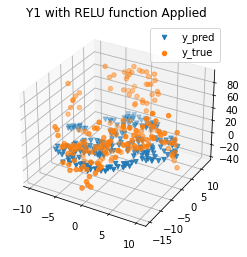

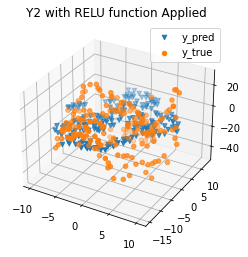

In [49]:
# Replotting the sample with y_true and y_pred
plot_3d(2, 'Y1 with RELU function Applied', X, y_true[:,0], y_pred[:,0])
plot_3d(2, 'Y2 with RELU function Applied', X, y_true[:,1], y_pred[:,1])

# Training without Activation function RELU

In [51]:
nn = Model(num_inputs=inputs, num_hidden=[4, 3], num_outputs=outputs, activation=None)
nn.fit(X, y_true, learning_rate, epochs)
y_pred = nn.forward(X)

err = mean_squared_error(y_true, y_pred)
print('Final MSE: {}'.format(err))

tf.Tensor(862.3131, shape=(), dtype=float32)
tf.Tensor(862.21204, shape=(), dtype=float32)
tf.Tensor(862.1164, shape=(), dtype=float32)
tf.Tensor(862.01514, shape=(), dtype=float32)
tf.Tensor(861.90674, shape=(), dtype=float32)
tf.Tensor(861.79065, shape=(), dtype=float32)
tf.Tensor(861.6668, shape=(), dtype=float32)
tf.Tensor(861.5352, shape=(), dtype=float32)
tf.Tensor(861.39624, shape=(), dtype=float32)
tf.Tensor(861.24994, shape=(), dtype=float32)
tf.Tensor(861.09674, shape=(), dtype=float32)
tf.Tensor(860.93677, shape=(), dtype=float32)
tf.Tensor(860.77057, shape=(), dtype=float32)
tf.Tensor(860.5986, shape=(), dtype=float32)
tf.Tensor(860.42084, shape=(), dtype=float32)
tf.Tensor(860.23804, shape=(), dtype=float32)
tf.Tensor(860.0503, shape=(), dtype=float32)
tf.Tensor(859.85803, shape=(), dtype=float32)
tf.Tensor(859.6615, shape=(), dtype=float32)
tf.Tensor(859.46094, shape=(), dtype=float32)
tf.Tensor(859.25665, shape=(), dtype=float32)
tf.Tensor(859.0489, shape=(), dtype=float

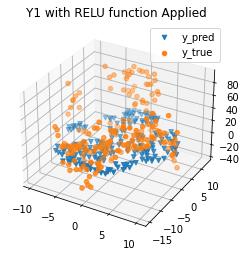

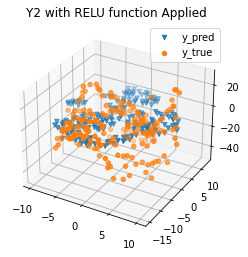

In [52]:
# Replotting the sample with y_true and y_pred
plot_3d(2, 'Y1 with RELU function Applied', X, y_true[:,0], y_pred[:,0])
plot_3d(2, 'Y2 with RELU function Applied', X, y_true[:,1], y_pred[:,1])